In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# データ読み込み
dataset = pd.read_csv("baseball_salary.csv")

In [3]:
# データを最初の5行だけ表示
dataset.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,...,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,...,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,...,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,...,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,...,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,...,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [4]:
# 中身を'打率'と'打点'の列のみにする
dataset = dataset.loc[:, ['打率', '打点']]
# 先頭の5行だけ表示して確認
dataset.head()

,打率,打点
0,0.308,92
1,0.271,56
2,0.290,60
3,0.265,78
4,0.292,48


In [5]:
# MinMaxScalerで正規化を実施
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
data_norm=scaler.fit_transform(dataset)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
# 正規化後のデータを確認（5行分だけ表示）

data_norm[0:5]

array([[0.616     , 0.87619048],
       [0.542     , 0.53333333],
       [0.58      , 0.57142857],
       [0.53      , 0.74285714],
       [0.584     , 0.45714286]])

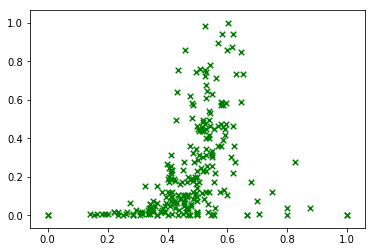

In [7]:
# 正規化後の打率と打点の散布図を描画する
plt.scatter(data_norm[:, 0], data_norm[:, 1], c='green', marker='x', s=30, label='normalize')

In [8]:
# 最大クラスター数を10としてWCSS値を取得
from sklearn.cluster import KMeans
wcss = []
n_comps = np.arange(1, 10)

for k in n_comps:
    # KMeansの初期化。initはデフォルトで"k-means++"、n_initもデフォルトで10
    km = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(data_norm)
    # inertia_属性に、WCSSの値が入っている
    wcss.append(km.inertia_)

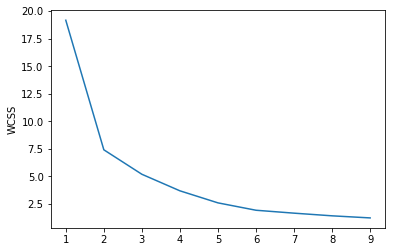

In [9]:
# 上記結果をplotにて可視化
fig = plt.figure(figsize=(6, 4))
plt.plot(n_comps, wcss)
plt.xlabel("")
plt.ylabel("WCSS")
plt.show()

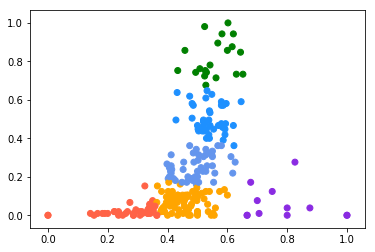

In [10]:
colors = ['dodgerblue', 'orange', 'green', 'tomato', 'blueviolet', 'cornflowerblue']
wcss = []
km = KMeans(n_clusters=6, init='k-means++', n_init=10).fit(data_norm)
wcss.append(km.inertia_)
labels = km.labels_
colors2 = [colors[x] for x in labels]
plt.scatter(data_norm[:, 0], data_norm[:, 1],color=colors2,)